Let's start 


In [1]:
from sklearn import datasets   #import data set from sklearn library


In [2]:
iris=datasets.load_iris()   #load the data set

In [3]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [4]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
print(iris.data[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [6]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
#creating data frame
import pandas as pd
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head(6)

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0


In [8]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [9]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [10]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9111111111111111


In [11]:
species_idx = clf.predict([[3, 5, 4, 2]])[0]
iris.target_names[species_idx]

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'virginica'

In [12]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal width (cm)     0.488543
petal length (cm)    0.393319
sepal length (cm)    0.088392
sepal width (cm)     0.029746
dtype: float64

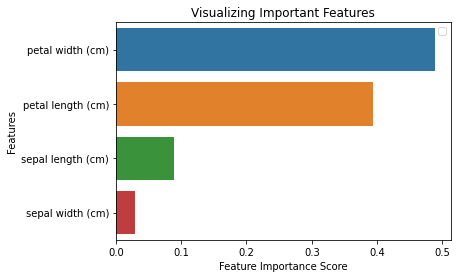

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [14]:
 #Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into features and labels
X=data[['petal length', 'petal width','sepal length']]  # Removed feature "sepal length"
y=data['species']                                       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [15]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


**Now we use Gaussian Naive Bayes**

In [16]:
from sklearn.naive_bayes import GaussianNB
bn= GaussianNB()

In [17]:
bn.fit(X_train, y_train)

GaussianNB()

In [18]:
y_pred = bn.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
print("accuracy score",accuracy_score(y_test,y_pred))

accuracy score 0.9333333333333333


In [21]:
iris=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
iris.head(20)

,Actual,Predicted
108,2,2
130,2,2
36,0,0
54,1,1
137,2,2
15,0,0
96,1,1
131,2,2
83,1,2
25,0,0


## **Now We use Multiomial Naive Bayes**

In [22]:
from sklearn.naive_bayes import MultinomialNB
mn= MultinomialNB()

In [23]:
mn.fit(X_train,y_train)

MultinomialNB()

In [24]:
y_pred = mn.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
print("accuracy score",accuracy_score(y_test,y_pred))   #here the accuracy is so low compare to GaussainNB and random forest

accuracy score 0.8444444444444444


In [27]:
iris=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
iris.head(20)

,Actual,Predicted
108,2,2
130,2,2
36,0,0
54,1,1
137,2,2
15,0,0
96,1,1
131,2,2
83,1,2
25,0,0
